## 2020 Census Data
Working From Home

 Imports and pulling in the data


In [456]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

pd.set_option('display.max_columns', None)

In [457]:
char_businesses = pd.read_csv('data/char_of_businesses.csv')

C:\Users\shane\AppData\Local\Temp\ipykernel_636504\382028314.py:1: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



In [458]:
char_businesses.head(3)

,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,QDESC,QDESC_LABEL,BUSCHAR,BUSCHAR_LABEL,YEAR,EMP_PCT_S,EMP,EMP_PCT,EMP_S,EMP_S_F,QDESC_LABEL.1,us
0,United States,0,Total for all sectors,2,Female,1,Total,0,Total,1,Total,B29,PERWHOME,A1,All firms,2020,0.0,10896836,0.0,1.5,NaN,PERWHOME,1
1,United States,0,Total for all sectors,2,Female,1,Total,0,Total,1,Total,B29,PERWHOME,EPA0,0 Percent of employees never worked from home,2020,0.8,113200,7.3,11.5,NaN,PERWHOME,1
2,United States,0,Total for all sectors,2,Female,1,Total,0,Total,1,Total,B29,PERWHOME,EPA1,1-25 Percent of employees never worked from home,2020,0.7,80444,5.2,7.7,NaN,PERWHOME,1


In [459]:
## Casting Employee Percent to a float
char_businesses['EMP_S']=pd.to_numeric(char_businesses['EMP_S'])
# char_businesses.info()

In [460]:
## Grouping By Sectors
sector_groups= char_businesses[['NAICS2017_LABEL','EMP_PCT_S']]
sector_groups.head()

,NAICS2017_LABEL,EMP_PCT_S
0,Total for all sectors,0.0
1,Total for all sectors,0.8
2,Total for all sectors,0.7
3,Total for all sectors,0.7
4,Total for all sectors,0.7


In [461]:
sector_buschar_wfh =char_businesses.groupby(['NAICS2017_LABEL', 'BUSCHAR_LABEL'])[['EMP_S']]
# sector_buschar_wfh = sector_buschar_wfh.drop('Total', axis=0)
sector_heatmap = sector_buschar_wfh.sum().unstack()
char_businesses['BUSCHAR_LABEL']
# for i in range(len(char_businesses['BUSCHAR_LABEL'])):
#     char_businesses['BUSCHAR_LABEL'][i] = '1'
char_businesses['BUSCHAR_LABEL'] = char_businesses['BUSCHAR_LABEL'].replace('Percent', '%', regex=True)
char_businesses['BUSCHAR_LABEL'] = char_businesses['BUSCHAR_LABEL'].replace('worked from home', "WFH", regex=True)
char_businesses['BUSCHAR_LABEL'] = char_businesses['BUSCHAR_LABEL'].replace({'one':'1','two':'2','three':'3','four': '4','five':'5'}, regex=True)

In [462]:
exclude = ['All firms','Not applicable','Total reporting','Item not reported']
char_exclude = char_businesses[~char_businesses['BUSCHAR_LABEL'].isin(exclude)]

In [463]:
char_exclude['BUSCHAR_LABEL'].value_counts()

76-100 % of employees WFH 5 days per week             14293
76-100 % of employees never WFH                       14016
1-25 % of employees WFH 2 to 4 days per week          12845
0 % of employees WFH less than 1 day per week         12293
76-100 % of employees WFH 2 to 4 days per week        12282
1-25 % of employees WFH 5 days per week               12185
0 % of employees WFH 1 day per week                   12178
26-50 % of employees WFH 2 to 4 days per week         11014
0 % of employees WFH 5 days per week                  10848
1-25 % of employees WFH 1 day per week                10831
1-25 % of employees WFH less than 1 day per week      10704
26-50 % of employees never WFH                        10666
0 % of employees worked 2 to 4 days per week          10538
0 % of employees never WFH                            10278
26-50 % of employees WFH 5 days per week               9967
51-75 % of employees never WFH                         9896
76-100 % of employees WFH less than 1 da

In [464]:
sector_heatmap =char_exclude.groupby(['NAICS2017_LABEL', 'BUSCHAR_LABEL'])[['EMP_S']]
sector_heatmap = sector_heatmap.sum().unstack()

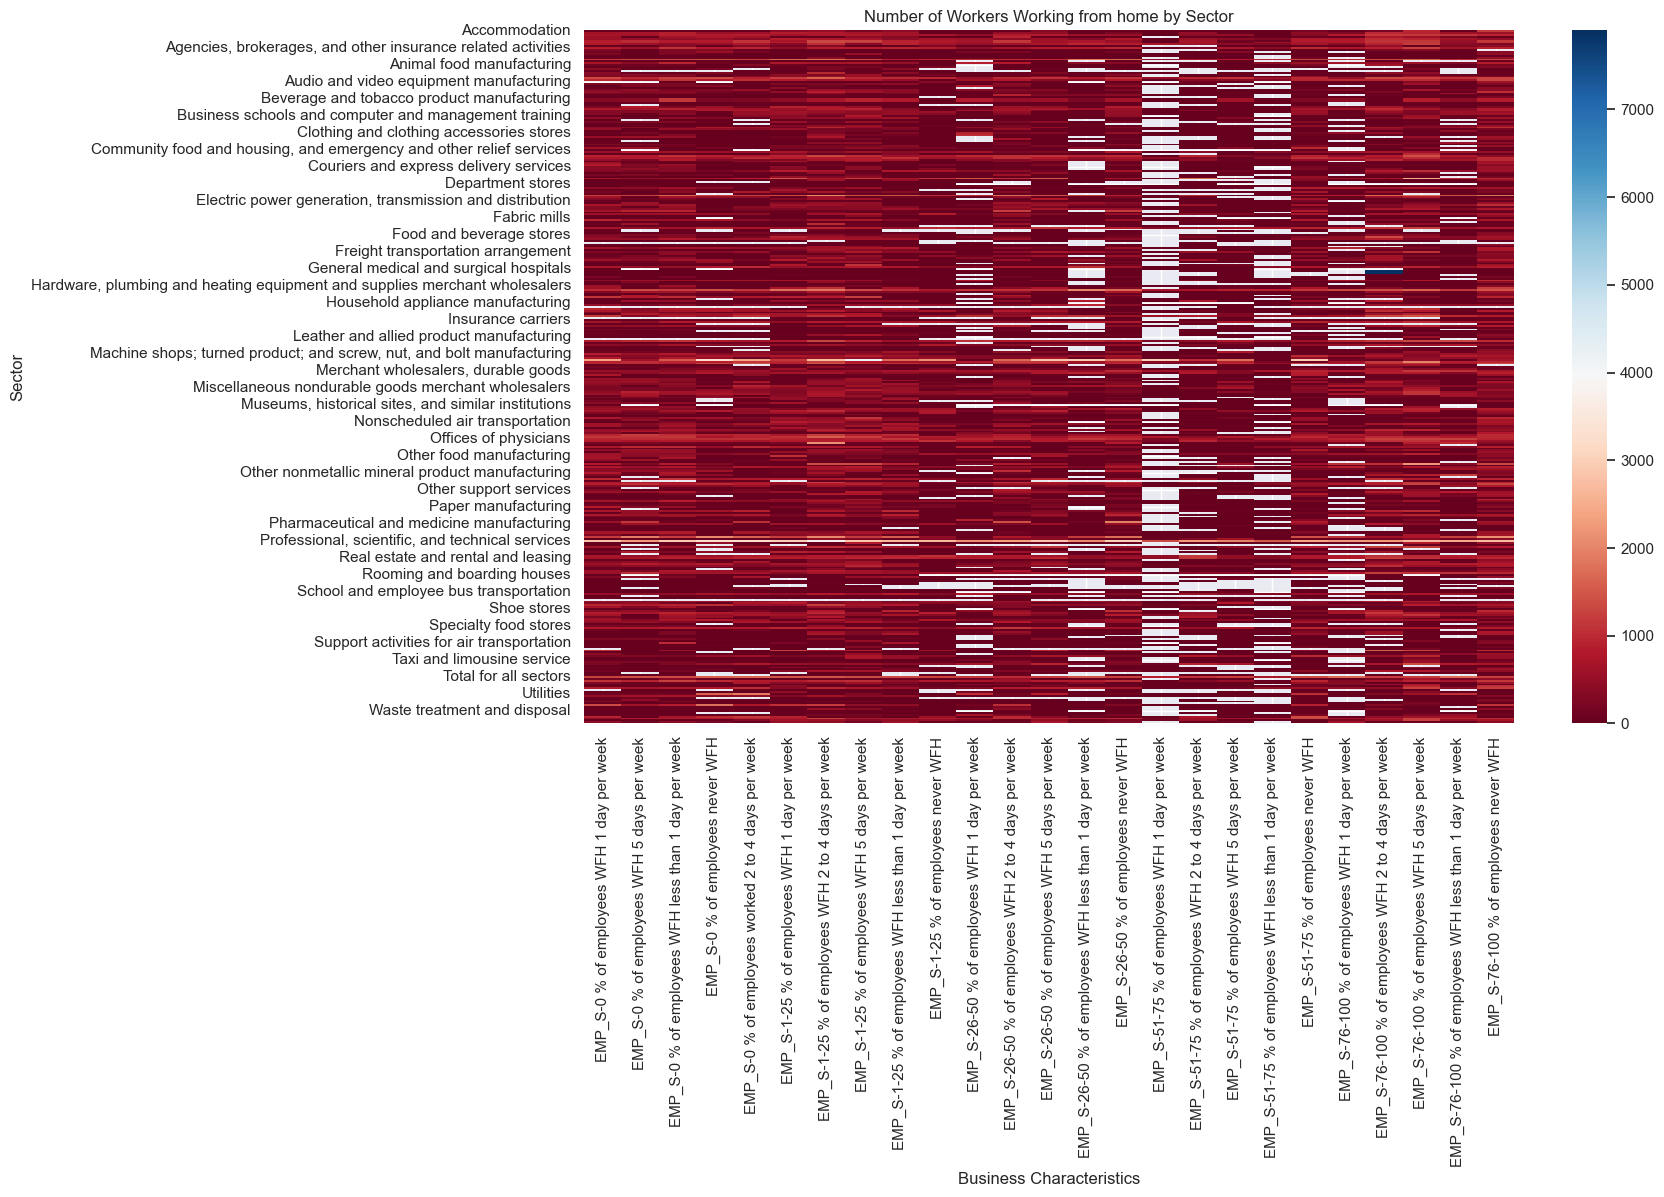

In [465]:
sns.heatmap(sector_heatmap, cmap='RdBu')
plt.title('Number of Workers Working from home by Sector')
plt.xlabel('Business Characteristics')
plt.ylabel('Sector')
sns.set(rc={'figure.figsize':(15,9)})
plt.show()

In [466]:
filtered_sectors = ['Professional, scientific, and technical services','Furniture and home furnishings stores','Merchant wholesalers, durable goods','Ambulatory health care services']
char_filtered_sectors = char_exclude[char_exclude['NAICS2017_LABEL'].isin(filtered_sectors)]

char_filtered_sectors_totals = char_filtered_sectors[(char_filtered_sectors['SEX_LABEL']=='Total') & (char_filtered_sectors['RACE_GROUP_LABEL'] == 'Total') & (char_filtered_sectors['ETH_GROUP_LABEL'] == 'Total') & (char_filtered_sectors['VET_GROUP_LABEL'] == 'Total')]

In [467]:
sector_heatmap2 =char_filtered_sectors_totals.groupby(['NAICS2017_LABEL', 'BUSCHAR_LABEL'])[['EMP_S']]
sector_heatmap2 = sector_heatmap2.sum().unstack()

In [468]:
sector_heatmap2.head()

EMP_S  \
BUSCHAR_LABEL                                    0 % of employees WFH 1 day per week   
NAICS2017_LABEL                                                                        
Ambulatory health care services                                                  8.5   
Furniture and home furnishings stores                                           10.1   
Merchant wholesalers, durable goods                                              6.4   
Professional, scientific, and technical services                                 6.0   

                                                                                       \
BUSCHAR_LABEL                                    0 % of employees WFH 5 days per week   
NAICS2017_LABEL                                                                         
Ambulatory health care services                                                   9.4   
Furniture and home furnishings stores                                             6.0   
Merchant wholesalers, durable goods                                              15.5   
Professional, scientific, and technical services                                 11.2   

                                                                                                \
BUSCHAR_LABEL                                    0 % of employees WFH less than 1 day per week   
NAICS2017_LABEL                                                                                  
Ambulatory health care services                                                            8.9   
Furniture and home furnishings stores                                                      6.6   
Merchant wholesalers, durable goods                                                        6.5   
Professional, scientific, and technical services                                           3.4   

                                                                             \
BUSCHAR_LABEL                                    0 % of employees never WFH   
NAICS2017_LABEL                                                               
Ambulatory health care services                                        10.2   
Furniture and home furnishings stores                                   0.0   
Merchant wholesalers, durable goods                                    12.8   
Professional, scientific, and technical services                        4.8   

                                                                                               \
BUSCHAR_LABEL                                    0 % of employees worked 2 to 4 days per week   
NAICS2017_LABEL                                                                                 
Ambulatory health care services                                                          12.2   
Furniture and home furnishings stores                                                     0.0   
Merchant wholesalers, durable goods                                                       8.7   
Professional, scientific, and technical services                                          9.2   

                                                                                         \
BUSCHAR_LABEL                                    1-25 % of employees WFH 1 day per week   
NAICS2017_LABEL                                                                           
Ambulatory health care services                                                     9.9   
Furniture and home furnishings stores                                               5.9   
Merchant wholesalers, durable goods                                                 5.8   
Professional, scientific, and technical services                                    7.2   

                                                                                               \
BUSCHAR_LABEL                                    1-25 % of employees WFH 2 to 4 days per week   
NAICS2017_LABEL                                                                      

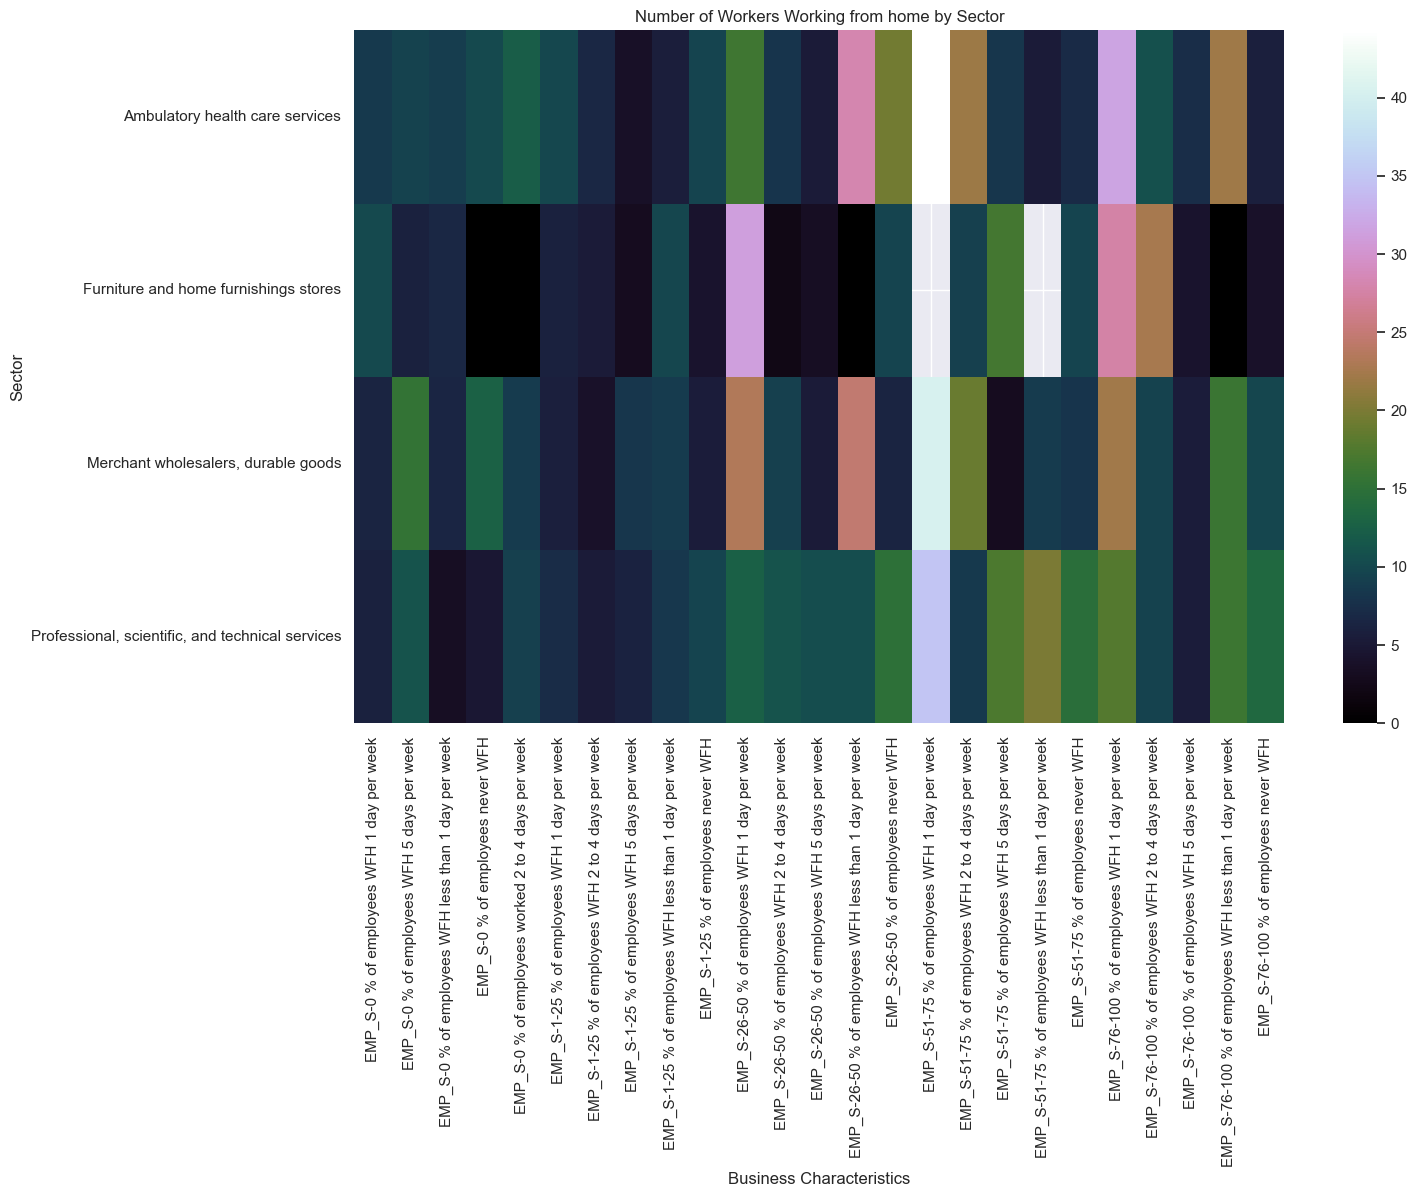

In [484]:
sns.heatmap(sector_heatmap2, cmap='cubehelix')
plt.title('Number of Workers Working from home by Sector')
plt.xlabel('Business Characteristics')
plt.ylabel('Sector')
plt.show()

Males Vs. Females working from home

In [470]:
char_filtered_sectors['SEX_LABEL'].value_counts()

Total                  3807
Male                   1454
Female                 1222
Equally male/female    1174
Classifiable            123
Unclassifiable          120
Name: SEX_LABEL, dtype: int64

In [471]:
female_wfh = char_filtered_sectors[(char_filtered_sectors['RACE_GROUP_LABEL'] == 'Total') & (char_filtered_sectors['ETH_GROUP_LABEL'] == 'Total') & (char_filtered_sectors['VET_GROUP_LABEL'] == 'Total')]
female_wfh = char_filtered_sectors[(char_filtered_sectors['SEX_LABEL'] == 'Male') | (char_filtered_sectors['SEX_LABEL'] == 'Female')]
female_wfh.SEX_LABEL.value_counts()

Male      1454
Female    1222
Name: SEX_LABEL, dtype: int64

In [472]:
female_wfh = female_wfh.groupby(['SEX_LABEL','NAICS2017_LABEL','BUSCHAR_LABEL',])['EMP_S'].sum().reset_index()
female_wfh.head(15)

,SEX_LABEL,NAICS2017_LABEL,BUSCHAR_LABEL,EMP_S
0,Female,Ambulatory health care services,0 % of employees WFH 1 day per week,253.8
1,Female,Ambulatory health care services,0 % of employees WFH 5 days per week,294.5
2,Female,Ambulatory health care services,0 % of employees WFH less than 1 day per week,302.1
3,Female,Ambulatory health care services,0 % of employees never WFH,223.6
4,Female,Ambulatory health care services,0 % of employees worked 2 to 4 days per week,246.3
5,Female,Ambulatory health care services,1-25 % of employees WFH 1 day per week,265.0
6,Female,Ambulatory health care services,1-25 % of employees WFH 2 to 4 days per week,285.8
7,Female,Ambulatory health care services,1-25 % of employees WFH 5 days per week,195.2
8,Female,Ambulatory health care services,1-25 % of employees WFH less than 1 day per week,154.0
9,Female,Ambulatory health care services,1-25 % of employees never WFH,116.4


## Merging genders

Looking at responses to working from home five days per week

In [473]:
char_filtered_sectors['BUSCHAR_LABEL'].value_counts()
buschar_filtered =['1-25 % of employees WFH 5 days per week','26-50 % of employees WFH 5 days per week','76-100 % of employees WFH 5 days per week']
char_filtered_sectors_buschar = female_wfh[female_wfh['BUSCHAR_LABEL'].isin(buschar_filtered)]
char_filtered_sectors_buschar

,SEX_LABEL,NAICS2017_LABEL,BUSCHAR_LABEL,EMP_S
7,Female,Ambulatory health care services,1-25 % of employees WFH 5 days per week,195.2
12,Female,Ambulatory health care services,26-50 % of employees WFH 5 days per week,256.2
22,Female,Ambulatory health care services,76-100 % of employees WFH 5 days per week,269.6
32,Female,Furniture and home furnishings stores,1-25 % of employees WFH 5 days per week,0.0
37,Female,Furniture and home furnishings stores,26-50 % of employees WFH 5 days per week,0.0
45,Female,Furniture and home furnishings stores,76-100 % of employees WFH 5 days per week,0.0
54,Female,"Merchant wholesalers, durable goods",1-25 % of employees WFH 5 days per week,0.0
59,Female,"Merchant wholesalers, durable goods",26-50 % of employees WFH 5 days per week,154.0
68,Female,"Merchant wholesalers, durable goods",76-100 % of employees WFH 5 days per week,109.3
78,Female,"Professional, scientific, and technical services",1-25 % of employees WFH 5 days per week,208.0


In [474]:
char_filtered_sectors_buschar['Category'] = char_filtered_sectors_buschar['NAICS2017_LABEL'] + ' ' +char_filtered_sectors_buschar['BUSCHAR_LABEL']

C:\Users\shane\AppData\Local\Temp\ipykernel_636504\3682150925.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='EMP_S', ylabel='Category'>

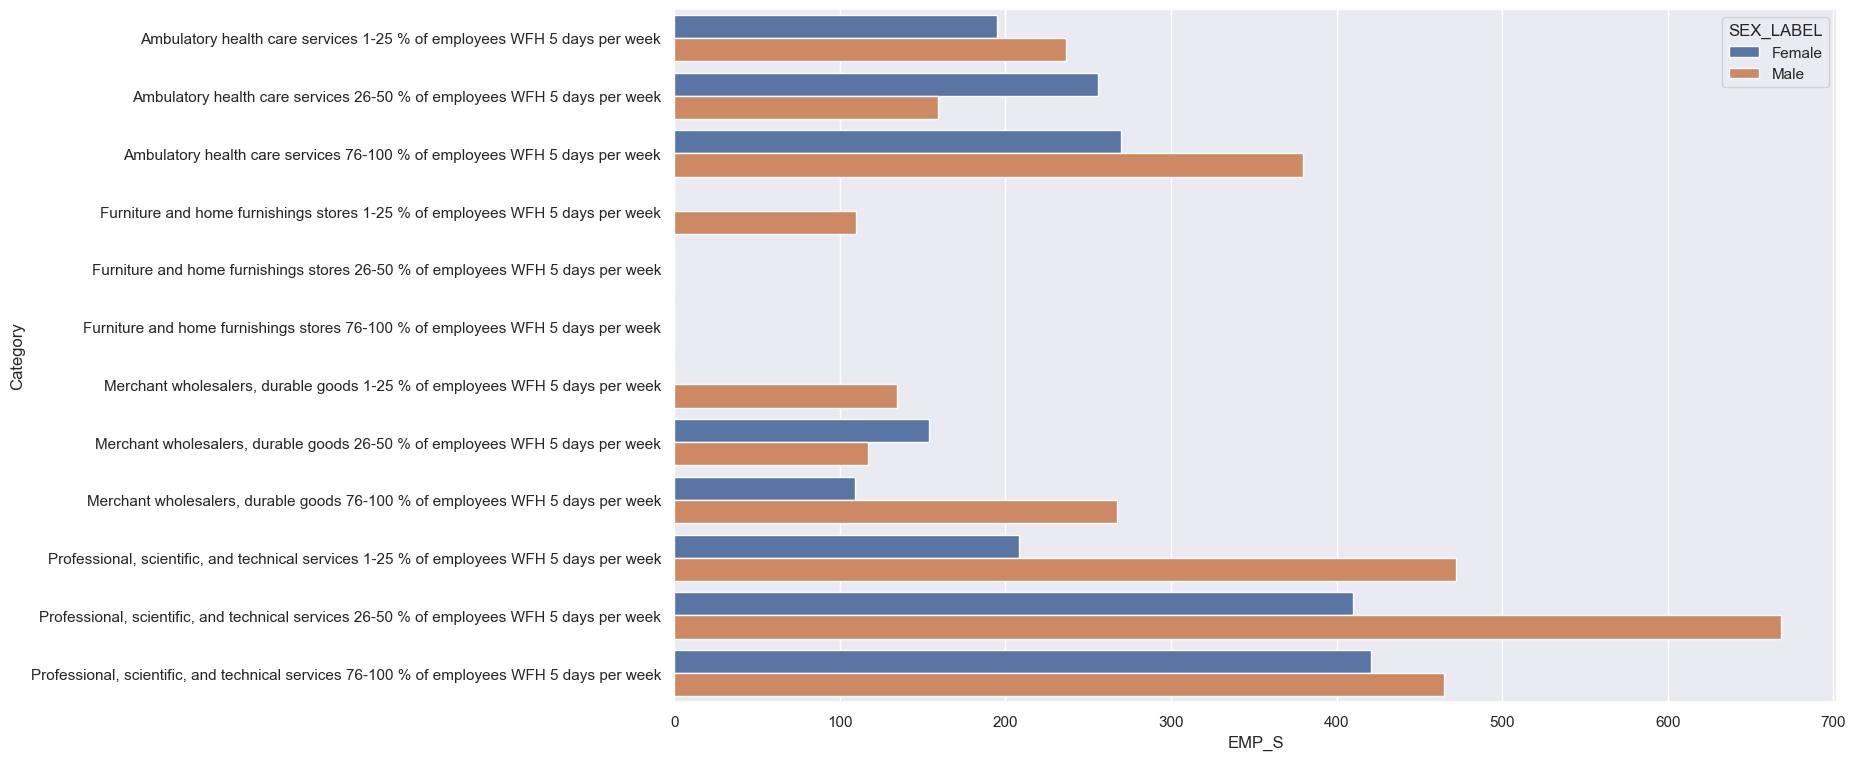

In [475]:
sns.barplot(x=char_filtered_sectors_buschar.EMP_S, y=char_filtered_sectors_buschar.Category, orient='h', hue=char_filtered_sectors_buschar.SEX_LABEL);

In [476]:
male = female_wfh[female_wfh['SEX_LABEL']== 'Male']
Female = female_wfh[female_wfh['SEX_LABEL']== 'Female']

In [477]:
## WFH 5 days a week for Male V Females

fig = go.Figure()

fig.add_trace(go.Bar(
    x=male['BUSCHAR_LABEL'],
    y=male['EMP_S'],
    name ='Male',
    marker_color='rgb(255,99,132)'
))
fig.add_trace(go.Bar(
    x=Female['BUSCHAR_LABEL'],
    y=Female['EMP_S'],
    name ='Female',
    marker_color='rgb(54,162,235)'
))

fig.update_layout(
    title='Males and Female WFH Status',
    xaxis_title='WFH',
    yaxis_title='Employee Count'
)

fig.show()